# GoT dataset

In [19]:
from model.graph_mcmc import Graph_MCMC

In [22]:
graph = Graph_MCMC()
graph.read_from_ns("game_thrones") # escorts could be fun
graph.remove_property("_graphml_vertex_id")
graph.remove_property("_pos")
graph.convert_props_to_flags()

Vertex props: ['Aegon', 'Aemon', 'Aerys', 'Alliser', 'Amory', 'Anguy', 'Arya', 'Balon', 'Barristan', 'Belwas', 'Beric', 'Bowen', 'Bran', 'Brienne', 'Bronn', 'Brynden', 'Catelyn', 'Cersei', 'Chataya', 'Craster', 'Cressen', 'Daario', 'Daenerys', 'Dalla', 'Davos', 'Doran', 'Drogo', 'Eddard', 'Eddison', 'Edmure', 'Elia', 'Ellaria', 'Gendry', 'Gilly', 'Gregor', 'Grenn', 'Hodor', 'Hoster', 'Illyrio', 'Ilyn', 'Irri', 'Jaime', 'Janos', 'Jeyne', 'Joffrey', 'Jojen', 'Jon', 'Jon Arryn', 'Jorah', 'Karl', 'Kevan', 'Kraznys', 'Lancel', 'Loras', 'Lothar', 'Luwin', 'Lysa', 'Mace', 'Mance', 'Margaery', 'Marillion', 'Meera', 'Melisandre', 'Meryn', 'Missandei', 'Myrcella', 'Nan', 'Oberyn', 'Olenna', 'Orell', 'Petyr', 'Podrick', 'Pycelle', 'Qhorin', 'Qyburn', 'Rakharo', 'Ramsay', 'Rattleshirt', 'Renly', 'Rhaegar', 'Rickard', 'Rickon', 'Robb', 'Robert', 'Robert Arryn', 'Roose', 'Roslin', 'Salladhor', 'Samwell', 'Sandor', 'Sansa', 'Shae', 'Shireen', 'Stannis', 'Styr', 'Theon', 'Thoros', 'Tommen', 'Tyrion', 

In [23]:
graph.print_info()

Graph with N=107 nodes, E=352 edges and D=107 vertex features


In [24]:
graph.G.edge_properties

{'weight': <EdgePropertyMap object with value type 'int16_t', for Graph 0x7ff507900dc0, at 0x7ff50790da30>}

In [28]:
graph.partition(B_min=5, B_max=20)

Performing inference...
    B: 12 <- 20    shrinking 20 -> 15
    B: 12 <- 20    B=15  niter:     1  count:    0  breaks:  0  min_S: 933.84878  max_S: 936.59853  S: 933.84878  ΔS:     -2.74975  moves:     2 
    B: 12 <- 20    B=15  niter:     2  count:    0  breaks:  0  min_S: 931.19154  max_S: 936.59853  S: 931.19154  ΔS:     -2.65725  moves:     3 
    B: 12 <- 20    B=15  niter:     3  count:    0  breaks:  0  min_S: 929.99988  max_S: 936.59853  S: 929.99988  ΔS:     -1.19165  moves:     3 
    B: 12 <- 20    B=15  niter:     4  count:    1  breaks:  1  min_S: 929.99988  max_S: 936.59853  S: 929.99988  ΔS:      0.00000  moves:     0 
    B: 12 <- 20    shrinking 15 -> 12
    B: 12 <- 20    B=12  niter:     1  count:    0  breaks:  0  min_S: 929.77063  max_S: 933.61735  S: 929.77063  ΔS:     -3.84672  moves:     5 
    B: 12 <- 20    B=12  niter:     2  count:    1  breaks:  1  min_S: 929.77063  max_S: 933.61735  S: 929.77063  ΔS:      0.00000  moves:     0 
Current bracket: (5, 12,

<VertexPropertyMap object with value type 'int32_t', for Graph 0x7ff507900dc0, at 0x7ff5074e58e0>

In [29]:
graph.mcmc(num_iter=1000)

100%|██████████| 1000/1000 [00:00<00:00, 1917.72it/s]


13

Drawing soft partition


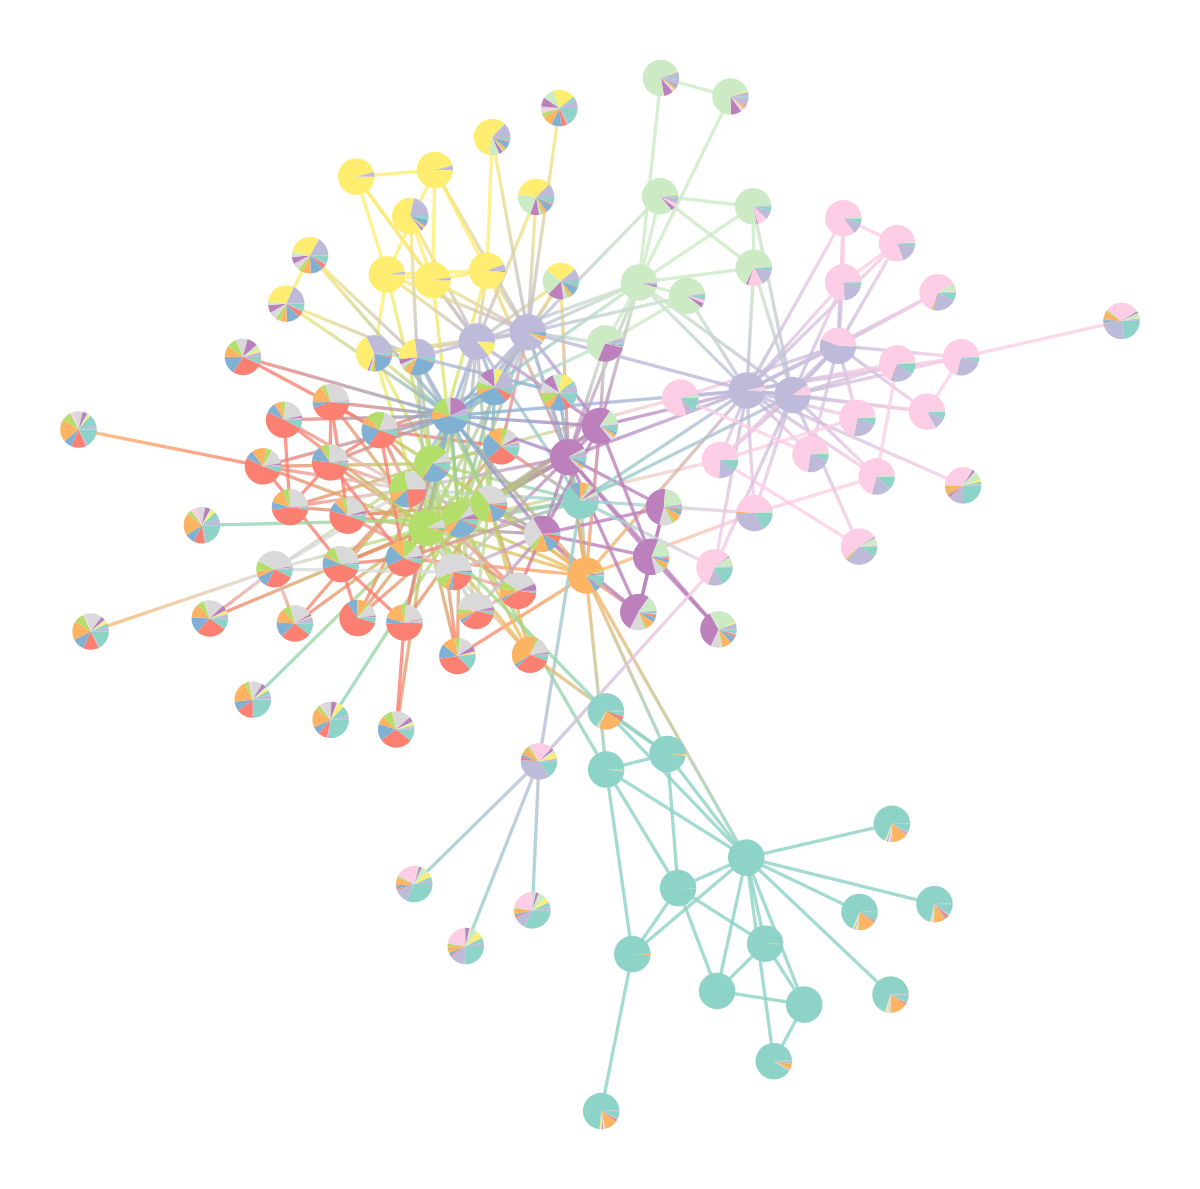

In [30]:
graph.draw()

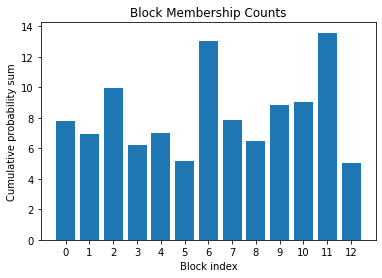

In [31]:
graph.plot_posterior_props()

## Train classifier

In [32]:
classifier = graph.sample_classifier_mala(10000, step_scaling=0.1, verbose=True)

100%|██████████| 10000/10000 [00:17<00:00, 585.53it/s]Sample accept ratio: 71.32%
Train. set accuracy: 14.953271028037381%



## Interpret results

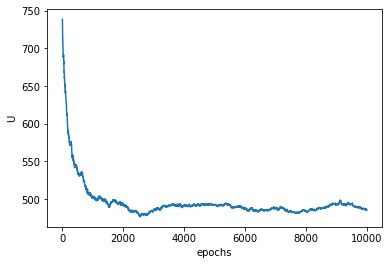

In [72]:
classifier.plot_U()

In [73]:
classifier.thin_samples()

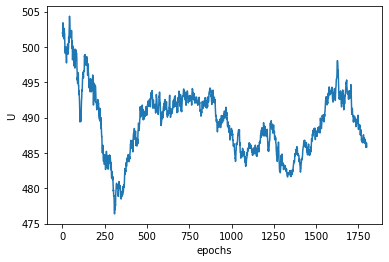

In [74]:
classifier.plot_U()

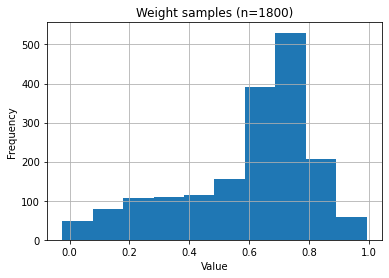

In [75]:
classifier.plot_sample_histogram()

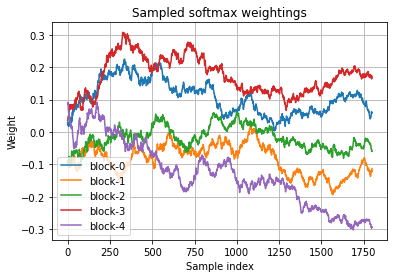

In [76]:
classifier.plot_sample_history()

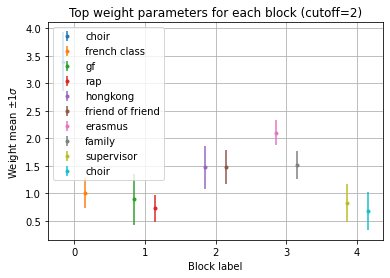

In [77]:
names = graph.get_feature_names()
classifier.plot_block_principal_dims(names, cutoff=2)

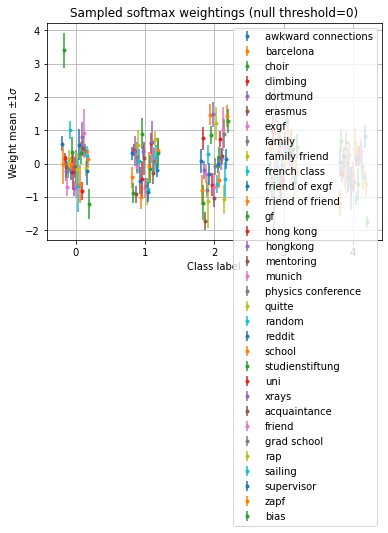

In [78]:
names = graph.get_feature_names()
classifier.plot_sampled_weights(names, std_dev_multiplier=1, null_space=0)